# Fuzzy Control Systems: The Water Heater Problem - The Hard Way
#### 參考連結：https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html
By using fuzzy control system which models how you control the water temperature at home. When you take a shower, you consider the water temperature in devise which is rated between 0 and 50℃, and gas volume size which is rated between 0 and 10. You use this to control the temperatuer of water between 15℃ and 45℃.
### Antecednets (Inputs)：water temperature in devise, gas volume
### Consequents (Outputs)：water temperature
### Rules：
#### 1.IF the devise temperature was low and the gas volume was low, THEN the water temperature will be cool.
#### 2.IF the devise temperature was low and the gas volume was high, THEN the water temperature will be warm.
#### 3.IF the devise temperature was high and the gas volume was low, THEN the water temperature will be hot.
#### 4.IF the devise temperature was high and the gas volume was high, THEN the water temperature will be very hot.
### Usage：
#### If I tell this controller that I rated:
the devise as 30℃, and the gas volume as 7,
#### it would recommend I leave:
30.43℃.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
x1_temp = np.arange(0, 51, 1)
x2_gas = np.arange(0, 11, 1)
y_temp = np.arange(15, 45, 1)

### Generate fuzzy membership functions

In [3]:
devise_lo = fuzz.trimf(x1_temp, [0, 0, 50])
devise_hi = fuzz.trimf(x1_temp, [0, 50, 50])

gas_lo = fuzz.trimf(x2_gas, [0, 0, 10])
gas_hi = fuzz.trimf(x2_gas, [0, 10, 10])

water_cool = fuzz.trimf(y_temp, [0, 15, 25])
water_warm = fuzz.trimf(y_temp, [15, 25, 35])
water_hot = fuzz.trimf(y_temp, [25, 35, 45])
water_very_hot = fuzz.trimf(y_temp, [35, 45, 55])

### Visualize these universal set and membership functions

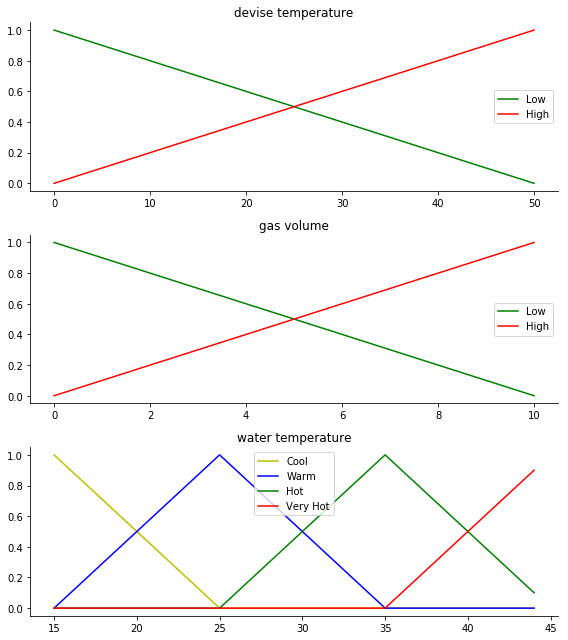

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x1_temp, devise_lo, 'g', linewidth=1.5, label='Low')
ax0.plot(x1_temp, devise_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('devise temperature')
ax0.legend()

ax1.plot(x2_gas, gas_lo, 'g', linewidth=1.5, label='Low')
ax1.plot(x2_gas, gas_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('gas volume')
ax1.legend()

ax2.plot(y_temp, water_cool, 'y', linewidth=1.5, label='Cool')
ax2.plot(y_temp, water_warm, 'b', linewidth=1.5, label='Warm')
ax2.plot(y_temp, water_hot, 'g', linewidth=1.5, label='Hot')
ax2.plot(y_temp, water_very_hot, 'r', linewidth=1.5, label='Very Hot')
ax2.set_title('water temperature')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### We need the activation of our fuzzy membership functions at these values.
### The exact values 30 and 7 do not exist on our universes...
### This is what fuzz.interp_membership exists for!

In [5]:
devise_level_lo = fuzz.interp_membership(x1_temp, devise_lo, 30)
devise_level_hi = fuzz.interp_membership(x1_temp, devise_hi, 30)

gas_level_lo = fuzz.interp_membership(x2_gas, gas_lo, 7)
gas_level_hi = fuzz.interp_membership(x2_gas, gas_hi, 7)

### Merge all membership functions in Fuzzy Inference Engine
### By using Mninmum Inference Engine (M.I.E)
### Now we take our rules and apply them：
#### Rule 1 concerns low temperature AND low gas.
#### Rule 2 concerns low temperature AND high gas.
#### Rule 3 concerns high temperature AND low gas.
#### Rule 4 concerns high temperature AND high gas.
#### The AND operator means we take the minimum of these two.

In [6]:
active_rule1 = np.fmin(devise_level_lo, gas_level_lo)
active_rule2 = np.fmin(devise_level_lo, gas_level_hi)
active_rule3 = np.fmin(devise_level_hi, gas_level_lo)
active_rule4 = np.fmin(devise_level_hi, gas_level_hi)

water_activation_cool = np.fmin(active_rule1, water_cool)
water_activation_warm = np.fmin(active_rule2, water_warm)
water_activation_hot = np.fmin(active_rule3, water_hot)
water_activation_very_hot = np.fmin(active_rule4, water_very_hot)

tip0 = np.zeros_like(y_temp)

### Visualize the Fuzzy Inference Engine：

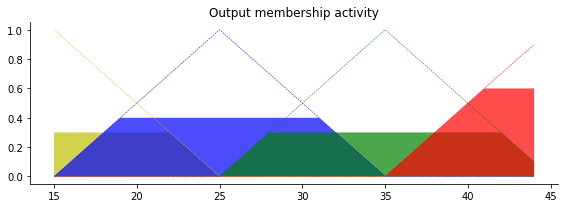

In [7]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(y_temp, tip0, water_activation_cool, facecolor='y', alpha=0.7)
ax0.plot(y_temp, water_cool, 'y', linewidth=0.5, linestyle='--', )
ax0.fill_between(y_temp, tip0, water_activation_warm, facecolor='b', alpha=0.7)
ax0.plot(y_temp, water_warm, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(y_temp, tip0, water_activation_hot, facecolor='g', alpha=0.7)
ax0.plot(y_temp,  water_hot, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(y_temp, tip0, water_activation_very_hot, facecolor='r', alpha=0.7)
ax0.plot(y_temp,  water_very_hot, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Aggregate all four output membership functions together

In [8]:
aggregated = np.fmax(water_activation_cool, np.fmax(water_activation_warm,
                     np.fmax(water_activation_hot, water_activation_very_hot)))

### Calculate defuzzified result
### By using Center Of Gravity defuzzification (C.O.G)

In [9]:
water_temp = fuzz.defuzz(y_temp, aggregated, 'centroid')
water_temp_activation = fuzz.interp_membership(y_temp, aggregated, water_temp)  # for plot

### Visualize this

The water temperature is 30.43171806167401 ℃


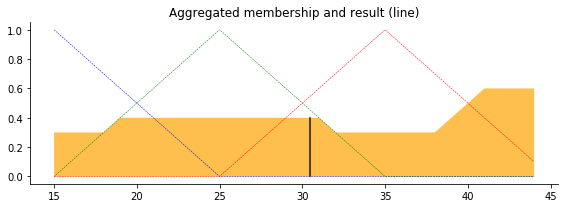

In [10]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(y_temp, water_cool, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(y_temp, water_warm, 'g', linewidth=0.5, linestyle='--')
ax0.plot(y_temp, water_hot, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(y_temp, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([water_temp, water_temp], [0, water_temp_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print("The water temperature is " + str(water_temp) + " ℃")